In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_profit_state = pd.read_csv('data/quarterly/profit.csv', index_col=0)
df_profit_private = pd.read_csv('data/quarterly/private_profit.csv', index_col=0)
df_assets_state = pd.read_csv('data/quarterly/total_assets.csv', index_col=0)
df_assets_private = pd.read_csv('data/quarterly/private_total_assets.csv', index_col=0)
df_equity_state = pd.read_csv('data/quarterly/total_equity_capital.csv', index_col=0)
df_equity_private = pd.read_csv('data/quarterly/private_equity_capital.csv', index_col=0)

In [6]:
def fix(df):
    last_index = df.index[-1]
    df.loc[last_index] = df.loc[last_index] / 2 * 3

In [7]:
fix(df_profit_state)
fix(df_profit_private)
fix(df_assets_state)
fix(df_profit_private)
fix(df_equity_state)
fix(df_equity_private)

In [8]:
numeric_cols = df_profit_state.select_dtypes(include=np.number).columns.tolist()
df_profit_state['profit_state'] = (df_profit_state[numeric_cols].sum(axis=1) - df_profit_state['privatbank']) / 5

numeric_cols_2 = df_profit_private.select_dtypes(include=np.number).columns.tolist()
df_profit_private['profit_private'] = df_profit_private[numeric_cols_2].sum(axis=1) / 13

numeric_cols = df_assets_state.select_dtypes(include=np.number).columns.tolist()
df_assets_state['assets_state'] = (df_assets_state[numeric_cols].sum(axis=1) - df_assets_state['privatbank']) / 5

numeric_cols_2 = df_assets_private.select_dtypes(include=np.number).columns.tolist()
df_assets_private['assets_private'] = df_assets_private[numeric_cols_2].sum(axis=1) / 13

df_profit = pd.DataFrame({
    'state': df_profit_state['profit_state'],
    'private': df_profit_private['profit_private'],
    'privatbank': df_profit_state['privatbank']
})
df_assets = pd.DataFrame({
    'state': df_assets_state['assets_state'],
    'private': df_assets_private['assets_private'],
    'privatbank': df_assets_state['privatbank']
})

df_roa = (df_profit / df_assets) * 100

start_date = '2023-01-01'
end_date = '2023-12-31'

df_roa = df_roa.loc[start_date:end_date]

print(df_roa['state'].mean())
print(df_roa['private'].mean())
print(df_roa['privatbank'].mean())

0.14355444973898834
0.2367230351648258
0.4207289928404225


<AxesSubplot: xlabel='date'>

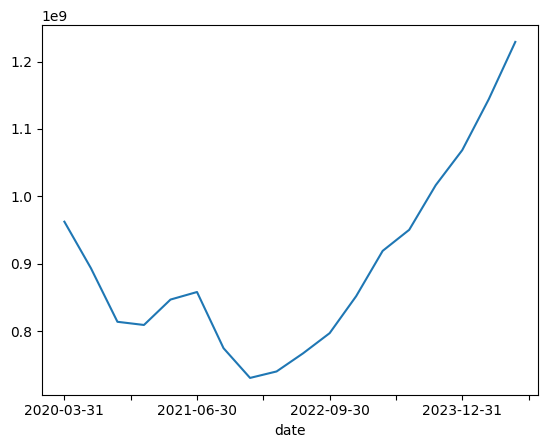

In [9]:
df_assets_state['oschadbank'].plot(kind='line')

In [10]:
numeric_cols = df_equity_state.select_dtypes(include=np.number).columns.tolist()
df_equity_state['equity_state'] = (df_equity_state[numeric_cols].sum(axis=1) - df_equity_state['privatbank']) / 5

numeric_cols_2 = df_equity_private.select_dtypes(include=np.number).columns.tolist()
df_equity_private['equity_private'] = df_equity_private[numeric_cols_2].sum(axis=1) / 13

df_equity = pd.DataFrame({
    'state': df_equity_state['equity_state'],
    'private': df_equity_private['equity_private'],
    'privatbank': df_equity_state['privatbank']
})

df_roe = (df_profit / df_equity) * 100
start_date = '2023-01-01'
end_date = '2023-12-31'

df_roe = df_roe.loc[start_date:end_date]
print(df_roe)
print(df_roe['state'].mean())
print(df_roe['private'].mean())
print(df_roe['privatbank'].mean())

               state   private  privatbank
date                                      
2023-03-31  4.751411  3.450732    7.917008
2023-06-30  5.012814  3.239682    7.355903
2023-09-30  6.812731  3.918506    5.746120
2023-12-31 -6.350433 -1.743553   -2.081646
2.5566307773656485
2.216341809669856
4.734346268816273


In [11]:
df_profit_combined = pd.concat([df_profit_state, df_profit_private], axis=1)
df_equity_combined = pd.concat([df_equity_state, df_equity_private], axis=1)
df_assets_combined = pd.concat([df_assets_state, df_assets_private], axis=1)

In [12]:
numeric_cols = ['privatbank', 'oschadbank', 'ukreximbank', 'ukrgasbank', 'sense', 'first investment bank', 'raiffeisen', 'fuib', 'ukrsibbank', 'universal', 'agricole', 'otp', 'citibank', 'pivdenny', 'kredobank', 'procredit', 'tascombank', 'ing', 'a - bank']
df_profit_combined['profit_combined'] = df_profit_combined[numeric_cols].sum(axis=1) / 19
df_assets_combined['assets_combined'] = df_assets_combined[numeric_cols].sum(axis=1) / 19

df_roa_total = (df_profit_combined['profit_combined'] / df_assets_combined['assets_combined']) * 100

In [13]:
df_equity_combined['equity_combined'] = df_equity_combined[numeric_cols_2].sum(axis=1) / 19

df_roe_total = (df_profit_combined['profit_combined'] / df_equity_combined['equity_combined']) * 100

In [14]:
df_roa_privatbank = (df_profit_combined['privatbank'] / df_assets_combined['privatbank']) * 100
df_roa_oschadbank = (df_profit_combined['oschadbank'] / df_assets_combined['oschadbank']) * 100
df_roa_ukreximbank = (df_profit_combined['ukreximbank'] / df_assets_combined['ukreximbank']) * 100
df_roa_ukrgasbank = (df_profit_combined['ukrgasbank'] / df_assets_combined['ukrgasbank']) * 100
df_roa_sense = (df_profit_combined['sense'] / df_assets_combined['sense']) * 100
df_roa_first_investment_bank = (df_profit_combined['first investment bank'] / df_assets_combined['first investment bank']) * 100

In [92]:
def create_hist_roa(bank, df, total_df):
    plt.figure(figsize=(12, 6))
    for i, (date, value) in enumerate(zip(pd.to_datetime(df.keys()), df.values)):
        if i == len(df) - 1:
            # Plot the first two-thirds of the last bar with normal transparency
            plt.bar(date, value * (2/3), width=40, align='center', color='#003049')
            # Plot the last one-third of the last bar with increased transparency
            plt.bar(date, value * (1/3), width=40, bottom=value * (2/3), align='center', color='#003049', alpha=0.5)
        else:
            plt.bar(date, value, width=40, align='center', color='#003049')
    plt.plot(pd.to_datetime(df.keys()), total_df.values, color='#CEAD5F', marker = 'o', linewidth=4, markersize = 8, label='Середнє ROA на ринку банків')
    plt.xlabel('Дата', fontsize = 16)
    plt.ylabel('Значення', fontsize = 16)
    plt.title(f'Показник ROA для банку: {bank}', fontsize = 16)
    x_ticks = pd.to_datetime(df.keys())
    short_labels = [label.strftime('%Y')[:4] for label in x_ticks]
    plt.xticks(x_ticks[::4], short_labels[::4], rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize = 12)
    plt.tight_layout()
    plt.show()

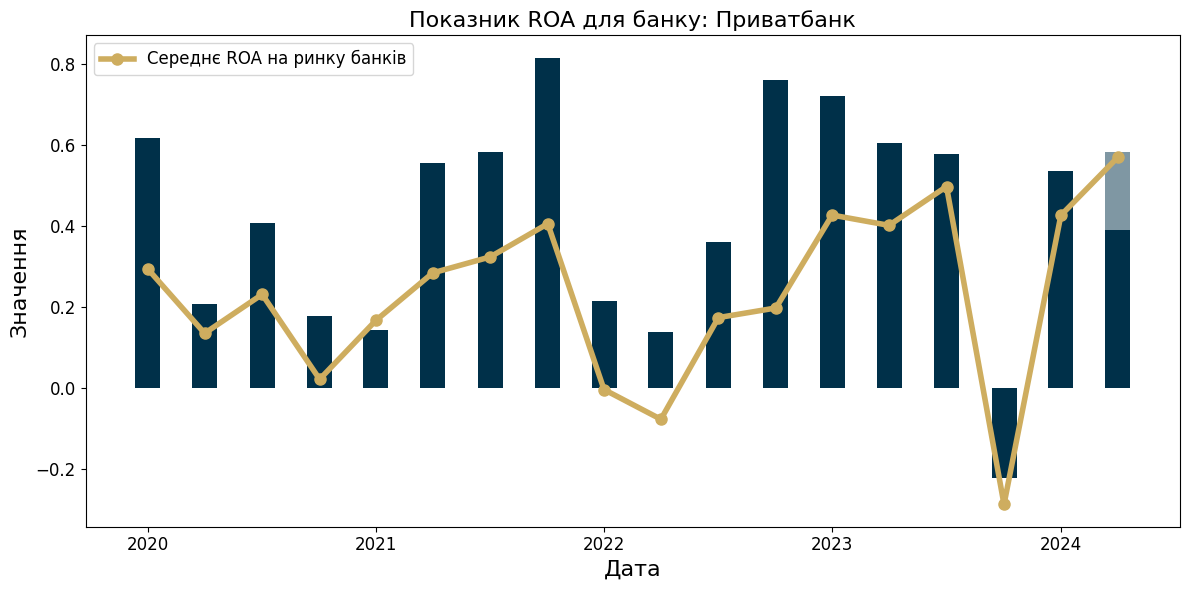

date
2020-03-31    0.617798
2020-06-30    0.206431
2020-09-30    0.407482
2020-12-31    0.178320
2021-03-31    0.142272
2021-06-30    0.556852
2021-09-30    0.582942
2021-12-31    0.816694
2022-03-31    0.216130
2022-06-30    0.138418
2022-09-30    0.361070
2022-12-31    0.760096
2023-03-31    0.722631
2023-06-30    0.605500
2023-09-30    0.577596
2023-12-31   -0.222810
2024-03-31    0.537347
2024-06-30    0.584035
Name: privatbank, dtype: float64


In [93]:
create_hist_roa('Приватбанк', df_roa_privatbank, df_roa_total)
print(df_roa_privatbank)

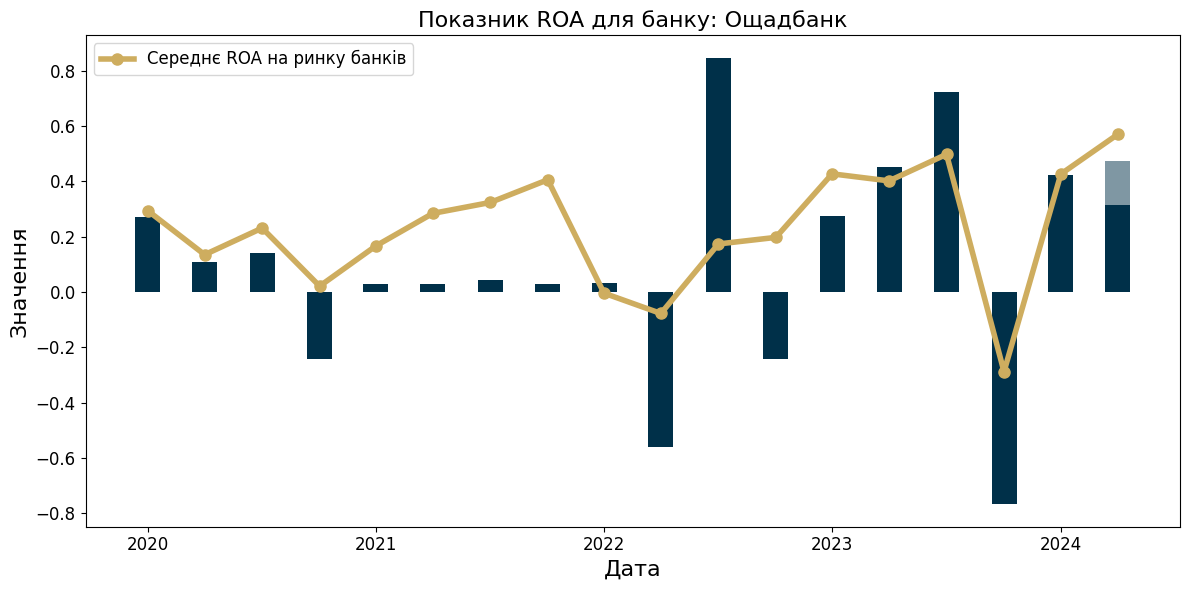

In [94]:
create_hist_roa('Ощадбанк', df_roa_oschadbank, df_roa_total)

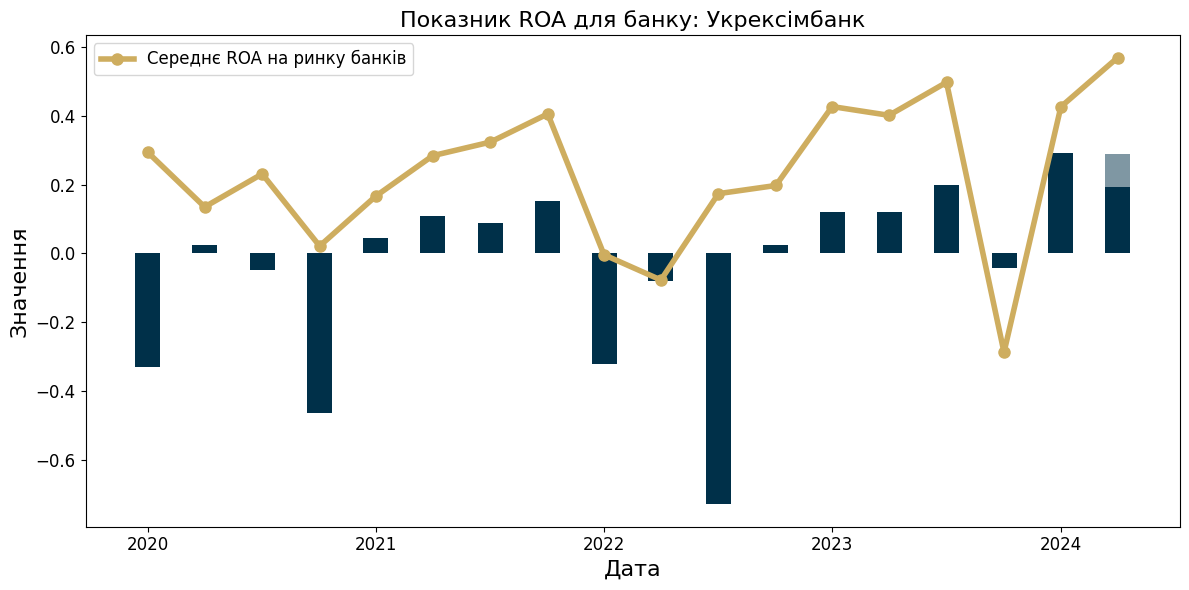

In [95]:
create_hist_roa('Укрексімбанк', df_roa_ukreximbank, df_roa_total)

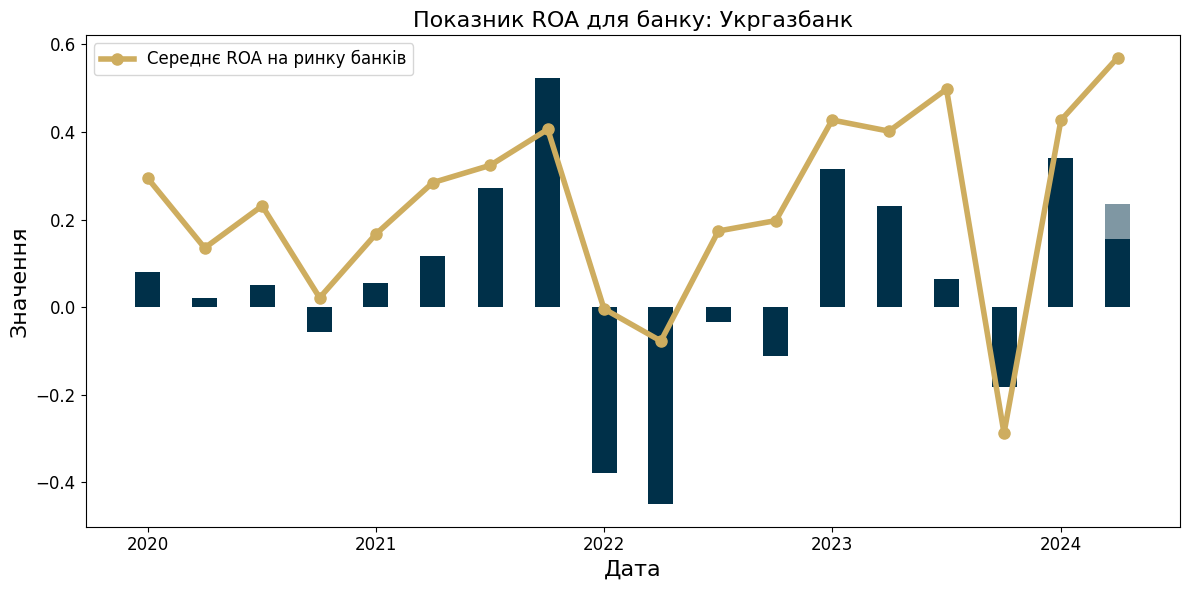

In [96]:
create_hist_roa('Укргазбанк', df_roa_ukrgasbank, df_roa_total)

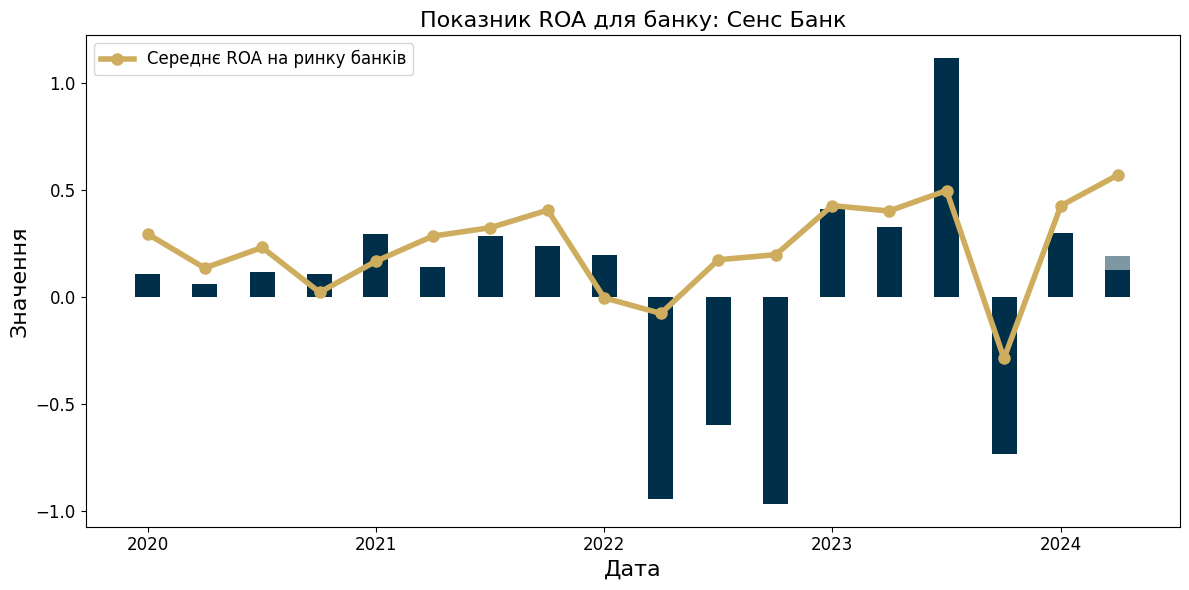

In [97]:
create_hist_roa('Сенс Банк', df_roa_sense, df_roa_total)

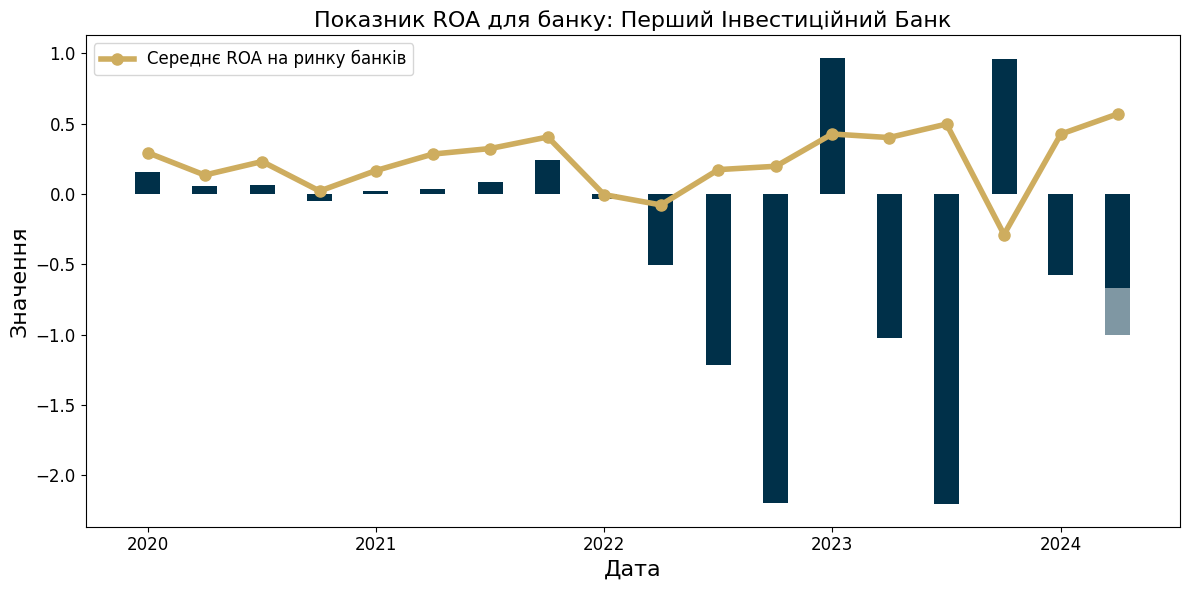

In [98]:
create_hist_roa('Перший Інвестиційний Банк', df_roa_first_investment_bank, df_roa_total)

In [22]:
df_roe_privatbank = (df_profit_combined['privatbank'] / df_equity_combined['privatbank']) * 100
df_roe_oschadbank = (df_profit_combined['oschadbank'] / df_equity_combined['oschadbank']) * 100
df_roe_ukreximbank = (df_profit_combined['ukreximbank'] / df_equity_combined['ukreximbank']) * 100
df_roe_ukrgasbank = (df_profit_combined['ukrgasbank'] / df_equity_combined['ukrgasbank']) * 100
df_roe_sense = (df_profit_combined['sense'] / df_equity_combined['sense']) * 100
df_roe_first_investment_bank = (df_profit_combined['first investment bank'] / df_equity_combined['first investment bank']) * 100

In [106]:
def create_hist_roe(bank, df, total_df):
    plt.figure(figsize=(12, 6))
    for i, (date, value) in enumerate(zip(pd.to_datetime(df.keys()), df.values)):
        if i == len(df) - 1:
            plt.bar(date, value * (2/3), width=40, align='center', color='#003049')
            plt.bar(date, value * (1/3), width=40, bottom=value * (2/3), align='center', color='#003049', alpha=0.5)
        else:
            plt.bar(date, value, width=40, align='center', color='#003049')
    plt.plot(pd.to_datetime(df.keys()), total_df.values, color='#CEAD5F', marker='o', linestyle='-', linewidth=4, markersize=8, label='Середнє ROE на ринку банків')
    plt.xlabel('Дата', fontsize = 16)
    plt.ylabel('Значення', fontsize = 16)
    plt.title(f'Показник ROE для банку: {bank}', fontsize = 16)
    x_ticks = pd.to_datetime(df.keys())
    short_labels = [label.strftime('%Y')[:4] for label in x_ticks]
    plt.xticks(x_ticks[::4], short_labels[::4], rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize = 12)
    plt.tight_layout()
    plt.show()

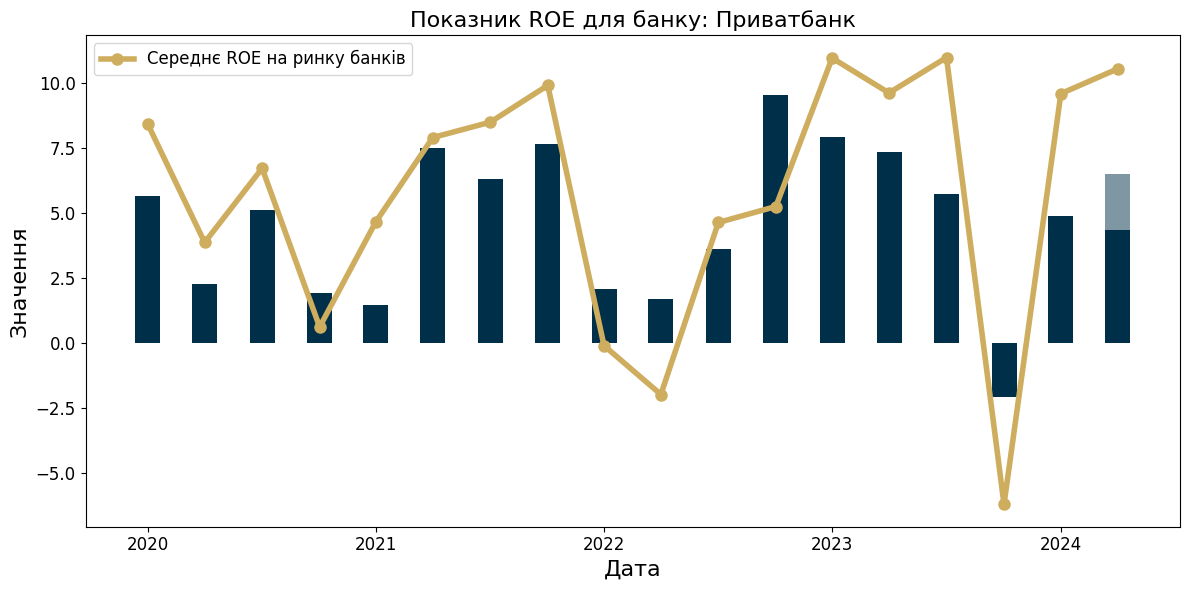

In [107]:
create_hist_roe('Приватбанк', df_roe_privatbank, df_roe_total)

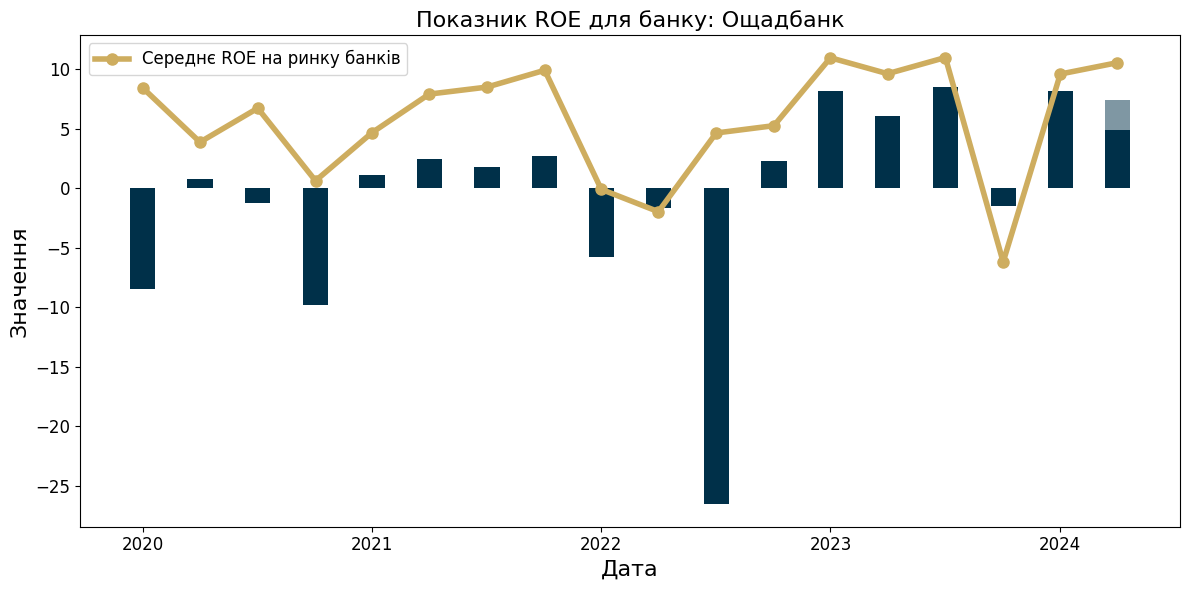

In [108]:
create_hist_roe('Ощадбанк', df_roe_ukreximbank, df_roe_total)

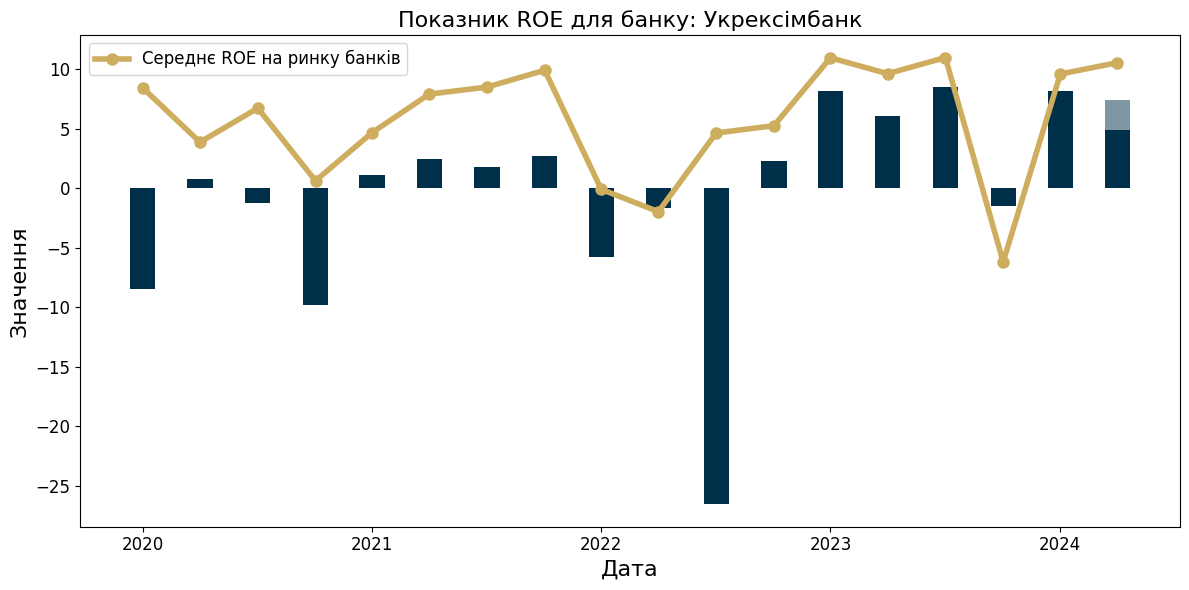

In [109]:
create_hist_roe('Укрексімбанк', df_roe_ukreximbank, df_roe_total)

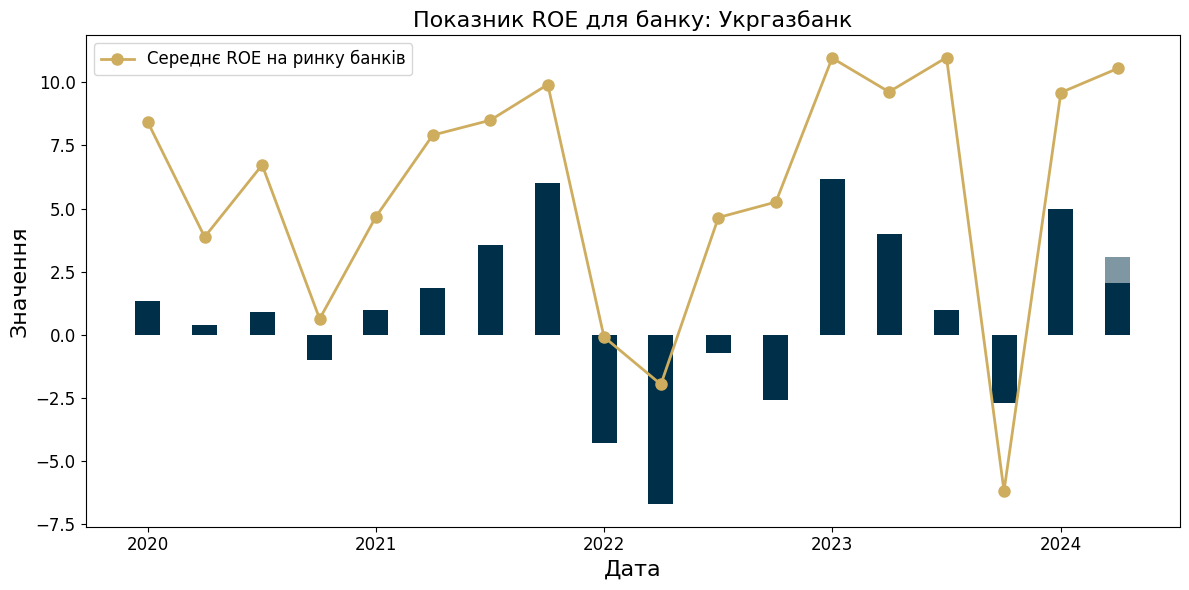

In [103]:
create_hist_roe('Укргазбанк', df_roe_ukrgasbank, df_roe_total)

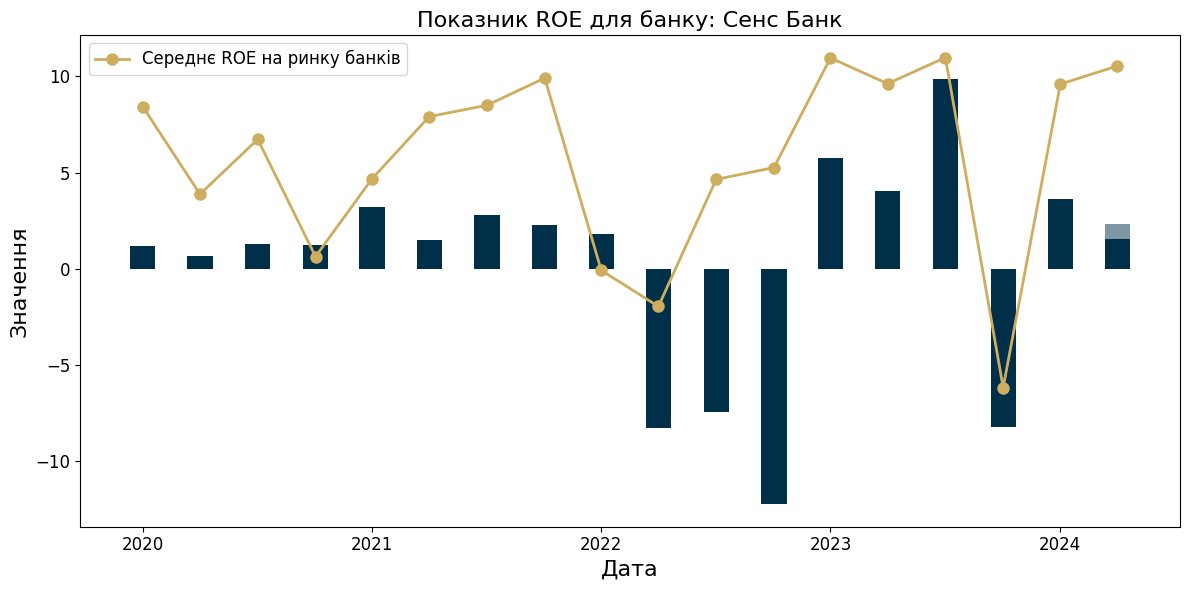

In [104]:
create_hist_roe('Сенс Банк', df_roe_sense, df_roe_total)

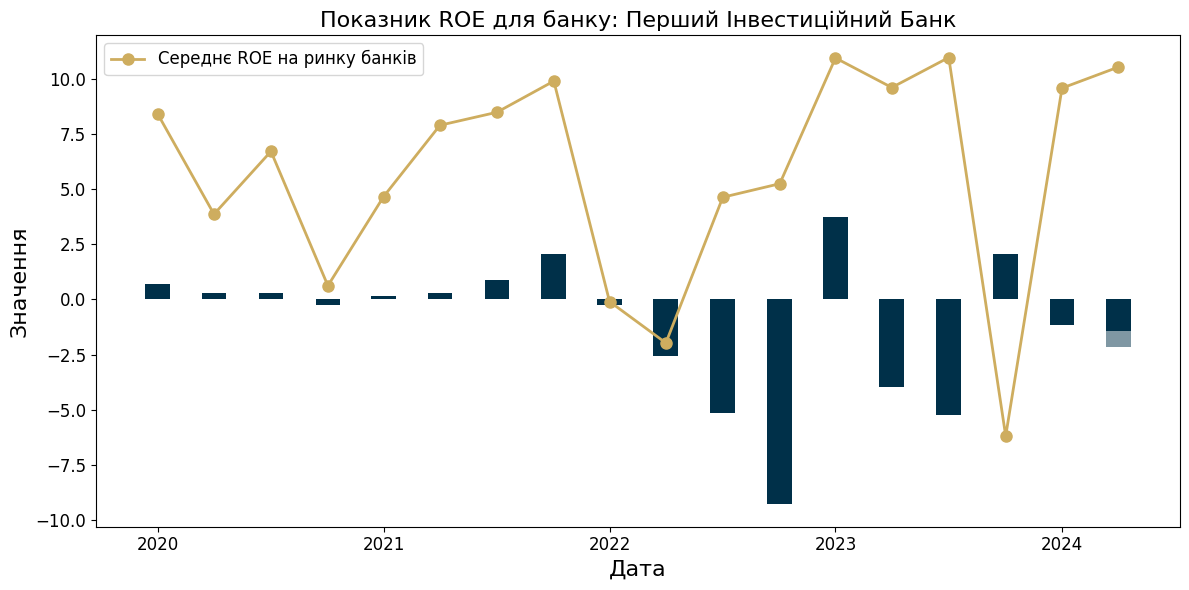

In [105]:
create_hist_roe('Перший Інвестиційний Банк', df_roe_first_investment_bank, df_roe_total)